In [1]:
import json,glob,os

base_path='/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/data/mutations/'
mujson=json.load(open(glob.glob(os.path.join(base_path,'outbreakinfo_mutation_report_data_*.json'))[0],'r'))

mutations={}
for m in mujson:
#     print(m['id'])
#     print(m['pangolin_lineage'])
    pango=m['pangolin_lineage']
    mut=m['mutation_simplified']
    gene=m['gene']
    prevalence=m['prevalence']
    
    if gene not in mutations: mutations[gene]={}
    
    if pango not in mutations[gene]: mutations[gene][pango]=[]
    
    if mut not in mutations[gene][pango] and prevalence>0.2:
        mutations[gene][pango].append(mut)
    
# print(mutations)

lin_name='B.1.620'

for gene in mutations:
    mutations[gene][lin_name]=[]
    
mutations['N'][lin_name]=['A220V']
mutations['ORF1a'][lin_name]=['T403I','V1991I','DEL3675/3677']
mutations['ORF1b'][lin_name]=['P314L','A1215S']
mutations['S'][lin_name]=['P26S','V126A','DEL144/144','DEL69/70','E484K','DEL241/243','P681H','D614G','H245Y','S477N','T1027I','D1118H']
mutations['ORF9b']={p: [] for p in mutations['S']} ## add pango lineages
mutations['ORF9b'][lin_name]=['I5T']

all_muts={}
for gene in mutations:
    if gene not in all_muts: all_muts[gene]=[]
    
    for lineage in mutations[gene]:
        for mut in mutations[gene][lineage]:
            if mut not in all_muts[gene]: all_muts[gene].append(mut)
                
print(mutations.keys())
for g in mutations:
    print(g,mutations[g][lin_name])

dict_keys(['S', 'ORF1a', 'ORF1b', 'N', 'ORF8', 'ORF3a', 'ORF7a', 'E', 'ORF9b'])
S ['P26S', 'V126A', 'DEL144/144', 'DEL69/70', 'E484K', 'DEL241/243', 'P681H', 'D614G', 'H245Y', 'S477N', 'T1027I', 'D1118H']
ORF1a ['T403I', 'V1991I', 'DEL3675/3677']
ORF1b ['P314L', 'A1215S']
N ['A220V']
ORF8 []
ORF3a []
ORF7a []
E []
ORF9b ['I5T']


ORF1a ['T403I', 'V1991I', 'DEL3675/3677']
['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429', 'B.1.617']
ORF1b ['P314L', 'A1215S']
['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429', 'B.1.617']
S ['P26S', 'DEL69/70', 'V126A', 'DEL144/144', 'DEL241/243', 'H245Y', 'S477N', 'E484K', 'D614G', 'P681H', 'T1027I', 'D1118H']
['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429', 'B.1.617']
ORF9b ['I5T']
['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429', 'B.1.617']
N ['A220V']
['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429', 'B.1.617']


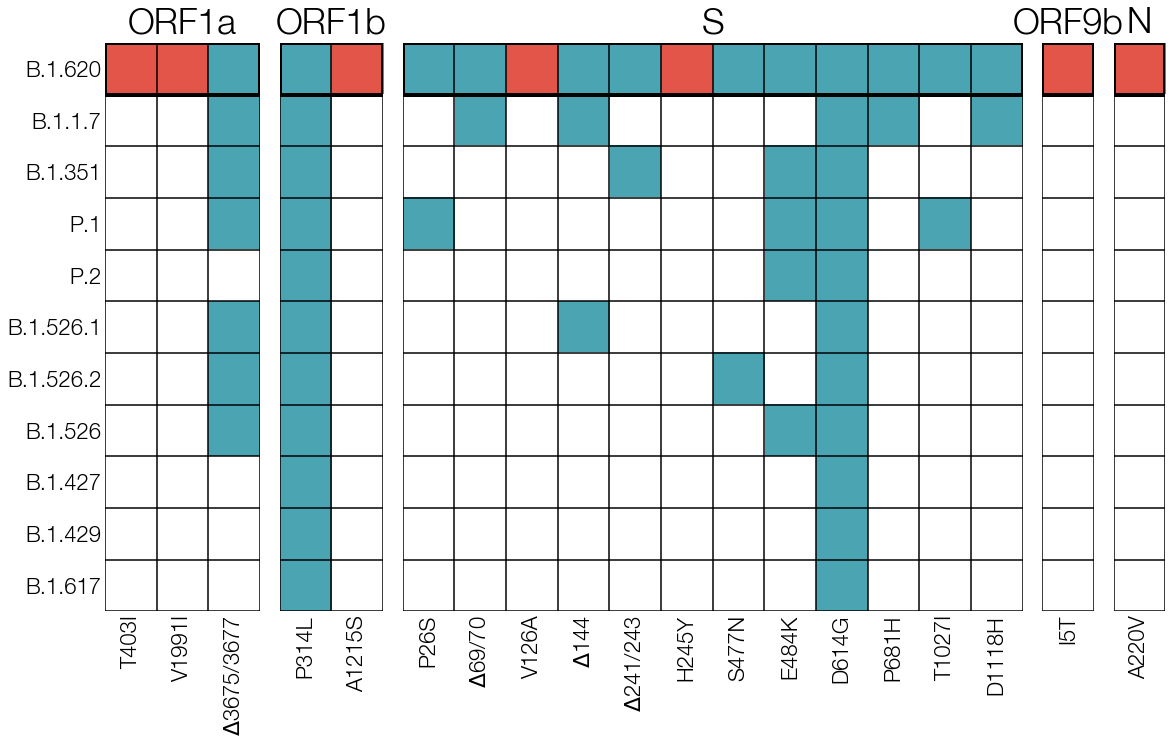

In [2]:
import matplotlib as mpl
from matplotlib import pyplot as plt
# import matplotlib.patheffects as path_effects
from matplotlib.patches import Rectangle,Polygon
from matplotlib.gridspec import GridSpec

typeface='Helvetica Neue'
mpl.rcParams['font.weight']=300
mpl.rcParams['axes.labelweight']=300
mpl.rcParams['font.family']=typeface
mpl.rcParams['font.size']=22
mpl.rcParams['pdf.fonttype']=42


import copy
import numpy as np

# focus_muts={'S': ['DEL69/70', 'V126A', 'DEL144/144', 'DEL241/243', 'H245Y', 'S477N', 'E484K', 'D614G', 'P681H', 'T1027I', 'D1118H'], 
#             'ORF1a': ['T403I', 'V1991I', 'DEL3675/3677'], 
#             'ORF1b': ['P314L','A1215S'], 
#             'ORF9b': ['I5T'], 
#             'N': ['A220V']}
focus_muts={gene: mutations[gene][lin_name] for gene in mutations}
# focus_muts={gene: all_muts[gene] for gene in mutations}


lin_order=['B.1.620', 'B.1.1.7', 'B.1.351', 'P.1', 'P.2', 'B.1.526.1', 'B.1.526.2', 'B.1.526', 'B.1.427', 'B.1.429','B.1.617'] ## fixed

genes=['ORF1a','ORF1b','S','ORF9b','N']
# genes=['ORF1a','ORF1b','S','N']
# genes=['S']
# print([focal_muts[g] for g in genes])
# print(sum([len(focal_muts[g]) for g in genes]))
fig = plt.subplots(figsize=(sum([len(focus_muts[g]) for g in genes]),len(lin_order)),facecolor='w')

gs = GridSpec(1,len(genes),hspace=0.01,wspace=0.1,width_ratios=[len(focus_muts[g]) for g in genes])

# for gene in mutations:
for g,gene in enumerate(genes):
    
    ax=plt.subplot(gs[g])
    
    mu_order=sorted(all_muts[gene],key=lambda x: int(x[1:-1]) if 'DEL' not in x else int(x[3:].split('/')[0]))
    
    if gene in focus_muts:
        mu_order=sorted(focus_muts[gene],key=lambda x: int(x[1:-1]) if 'DEL' not in x else int(x[3:].split('/')[0]))
#         mu_order=focus_muts[gene]
    
    print(gene,mu_order)
    
    print(lin_order)
    
    matrix=np.zeros((len(lin_order),len(mu_order)))
    
    for i,l in enumerate(lin_order): ## iterate over lineages
        for j,m in enumerate(mu_order): ## iterate over mutations
            if l in mutations[gene] and m in mutations[gene][l]: ## mutation present in lineage
                matrix[i][j]=0.15
                unique=True
                for l2 in lin_order:
                    if l2!=l and m in mutations[gene][l2]:
                        unique=False
                if unique:
                    matrix[i][j]=0.85
            else:
                matrix[i][j]=np.nan
            
        
    cmap=copy.copy(mpl.cm.Spectral_r)
    cmap.set_bad('w')
    norm=mpl.colors.Normalize(0,1)
    ax.imshow(matrix,cmap=cmap,norm=norm)
    
    ax.add_patch(Rectangle((-0.5,-0.5),len(mu_order),1,facecolor='none',edgecolor='k',lw=4))
#     ax.imshow(matrix)
    
    
    ax.set_yticks(range(len(lin_order)))
    ax.set_yticklabels(lin_order)

    ax.set_xticks(range(len(mu_order)))
    ax.set_xticklabels([m.replace('/144','').replace('DEL','$\Delta$') for m in mu_order],rotation=90)
    
    ax.tick_params(size=0)
    [ax.axhline(y-0.5,color='k',zorder=100) for y in range(len(lin_order)+1)]
    [ax.axvline(y-0.5,color='k',zorder=100) for y in range(len(mu_order)+1)]
    
    ax.xaxis.set_label_position('top')
    ax.xaxis.labelpad=10
    ax.set_xlabel(gene,size=36)
    
    [ax.spines[loc].set_visible(False) for loc in ax.spines]
    if g!=0:
        ax.set_yticklabels([])
        
plt.savefig('/Users/evogytis/Documents/manuscripts/SARS-CoV-2_kitenis/SuppFig3_vocMuts.png',dpi=100,bbox_inches='tight')
plt.show()

In [3]:
print((sum([len(focus_muts[g]) for g in genes]),len(lin_order)))
print([len(focus_muts[g]) for g in genes])

(19, 11)
[3, 2, 12, 1, 1]
